# 项目：TMDB电影数据分析报告

## 目录
<ul>
<li><a href="#intro">一、简介</a></li>
<li><a href="#wrangling">二、数据整理</a></li>
<li><a href="#eda">三、探索性数据分析</a></li>
<li><a href="#conclusions">四、结论</a></li>
<li><a href="#bind">五、限制</a></li>
</ul>

<a id='intro'></a>
## 一、简介

通过对TMDB电影数据的清洗和整理，我们重点研究了以下几个问题：电影票房和预算评分热议度之间的关系、最受欢迎的电影类型、最高产的电影导演等。

In [7]:
#载入分析数据时必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#读入要分析的数据
df = pd.read_csv('tmdb_movies.csv')

<a id='wrangling'></a>
## 二、数据整理


In [9]:
#初次查看数据
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#查看数据都有哪些列
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#由于上一步没有显示出keywords列，所以在这里做进一步观察
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [6]:
#查看数据集各列的数据类型和缺失值的情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**我们可以看到，整个数据集一共有10866行，有若干列有不同程度的缺失。其中homepage、tagline、keywords、production_companies缺失较为严重，缺失情况均超过总数据的十分之一。**

In [12]:
#数据集的行列数
df.shape

(10866, 21)

In [13]:
#查看数据集的唯一值情况
len(df.id.unique())

10865

In [14]:
#查看数据集的重复行情况
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

### 清理数据
#### 数据存在如下问题：1. 数据中某些列的缺失情况严重 2. 数据中存在重复行 3. 部分列的数据类型不便于处理 4. 部分数列与我们准备要研究的问题关系不大。
#### 数据修改思路：1. 对于缺失值严重的数列，我们予以删除 2. 删除重复行 3. 转换部分列的数据类型 4. 删除不必要的列

In [16]:
#根据缺失值情况和我们准备研究的问题我们只选择对所研究问题有用的列
df_movies = df.drop(['imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','runtime','production_companies'],axis=1)
df_movies.head()

,id,popularity,original_title,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
#查看新生成的数据集的行列数
df_movies.shape

(10866, 11)

In [18]:
#查看新数据集的缺失值情况
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [20]:
#删除具有缺失值的行
df_movies.dropna(inplace=True)

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 11 columns):
id                10801 non-null int64
popularity        10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1012.6+ KB


In [22]:
#查看新数据集的重复行
df_movies.duplicated().value_counts()

False    10800
True         1
dtype: int64

In [23]:
#删除重复行
df_movies.drop_duplicates(inplace=True)

df_movies.duplicated().value_counts()

False    10800
dtype: int64

<a id='eda'></a>
## 探索性数据分析


### 研究问题 1 : 评分前十的电影是哪些？

In [54]:
df_sort_vote = df_movies.sort_values(by=['vote_average'],ascending=False)
df_sort_vote_top10 = df_sort_vote.iloc[:10]
df_sort_vote_top10 = df_sort_vote_top10.loc[:,['original_title','vote_count','vote_average','budget_adj','revenue_adj']]

df_sort_vote_top10.reset_index(drop=True,inplace=True)
df_sort_vote_top10

,original_title,vote_count,vote_average,budget_adj,revenue_adj
0,The Story of Film: An Odyssey,14,9.2,0.0,0.0
1,The Mask You Live In,11,8.9,0.0,0.0
2,Black Mirror: White Christmas,41,8.8,0.0,0.0
3,Life Cycles,27,8.8,0.0,0.0
4,Pink Floyd: Pulse,23,8.7,0.0,0.0
5,Queen - Rock Montreal,14,8.5,0.0,0.0
6,Dave Chappelle: Killin' Them Softly,17,8.5,0.0,0.0
7,A Personal Journey with Martin Scorsese Throug...,11,8.5,0.0,0.0
8,The Art of Flight,60,8.5,0.0,0.0
9,Bill Hicks: Relentless,10,8.4,0.0,0.0


**如上所述，是数据集中评分前十的电影。同时我们注意到这十部电影的评论人很少，且电影预算和票房都为0，因此我们有理由认为数据可能出现丢失或失真，结果还有待商榷。**

### 研究问题 2 ：电影评分和票房的关系？电影预算和评分的关系？电影预算和票房的关系？热议度和票房的关系？

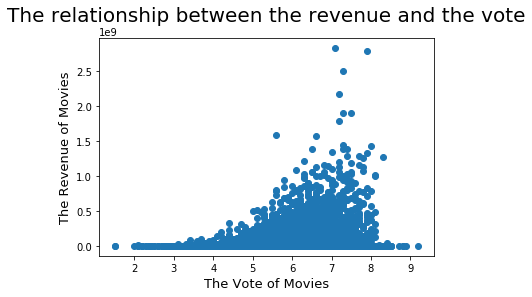

In [50]:
#以上四个问题均适合使用散点图来可视化

#电影评分和票房的关系
fig,ax = plt.subplots()
ax.scatter(df_movies.vote_average,df_movies.revenue_adj)
ax.set_xlabel('The Vote of Movies',fontsize = 13)
ax.set_ylabel('The Revenue of Movies',fontsize = 13)
ax.set_title('The relationship between the revenue and the vote',fontsize = 20,y=1.05)
plt.show()

**除去我们认为数据可能出现错误的几部高评分电影，我们可以认为电影评分和电影票房大致呈正相关，其中七分到八分的高票房电影最多。**

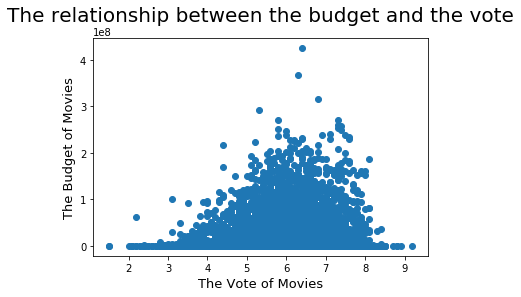

In [55]:
#电影预算和评分的关系
fig,ax = plt.subplots()
ax.scatter(df_movies.vote_average,df_movies.budget_adj)
ax.set_xlabel('The Vote of Movies',fontsize = 13)
ax.set_ylabel('The Budget of Movies',fontsize = 13)
ax.set_title('The relationship between the budget and the vote',fontsize = 20,y=1.05)
plt.show()

**除去我们认为数据可能出现错误的几部高评分电影，我们发现高预算和高评分之间并没有绝对的正向关系。**

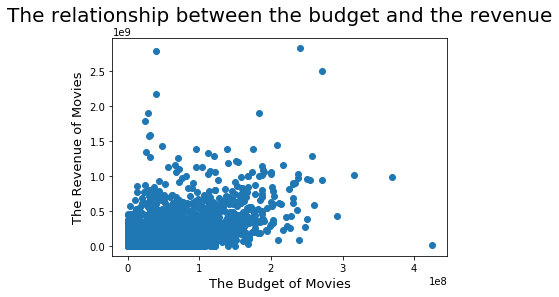

In [56]:
#电影预算和票房的关系
fig,ax = plt.subplots()
ax.scatter(df_movies.budget_adj,df_movies.revenue_adj)
ax.set_xlabel('The Budget of Movies',fontsize = 13)
ax.set_ylabel('The Revenue of Movies',fontsize = 13)
ax.set_title('The relationship between the budget and the revenue',fontsize = 20,y=1.05)
plt.show()

**我们发现电影预算和电影票房之间没有大多的正向关系，此数据可能为电影市场前期资本投入提供一些思考。**

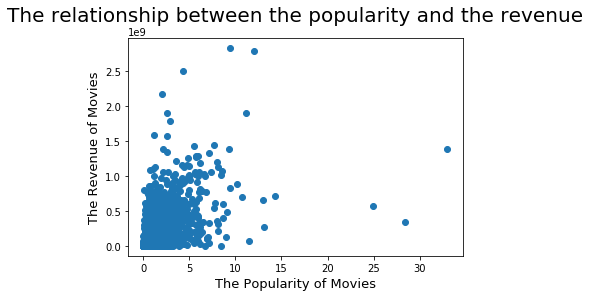

In [58]:
#热议度和票房的关系
fig,ax = plt.subplots()
ax.scatter(df_movies.popularity,df_movies.revenue_adj)
ax.set_xlabel('The Popularity of Movies',fontsize = 13)
ax.set_ylabel('The Revenue of Movies',fontsize = 13)
ax.set_title('The relationship between the popularity and the revenue',fontsize = 20,y=1.05)
plt.show()

**由图可知，电影的热议度并不能带来电影的高票房。虚高的热议度很有可能是制片方为了宣传需要请的水军。**

### 研究问题3：电影数量和年度总票房随年份的变化。

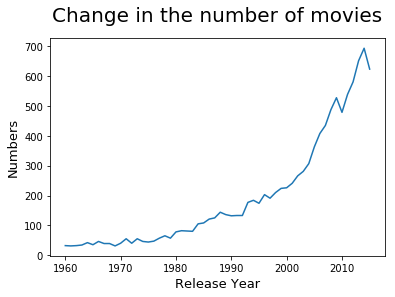

In [67]:
#电影数量随年份的变化
df_movies['id'].groupby(df_movies['release_year']).count().plot()
plt.xlabel('Release Year',fontsize=13)
plt.ylabel('Numbers',fontsize=13)
plt.title('Change in the number of movies',fontsize=20,y=1.05);

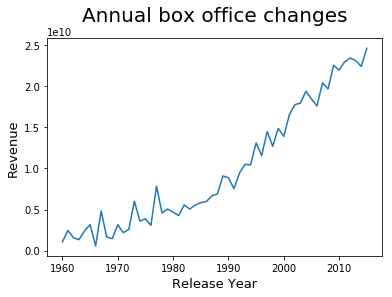

In [70]:
#年度总票房随年份的变化
df_movies['revenue_adj'].groupby(df_movies['release_year']).sum().plot()
plt.xlabel('Release Year',fontsize=13)
plt.ylabel('Revenue',fontsize=13)
plt.title('Annual box office changes',fontsize=20,y=1.05);

**由图可知，年度电影数量和年度电影总票房逐年攀升，说明近些年来电影行业蓬勃发展。**

### 研究问题4：导演作品数量排名

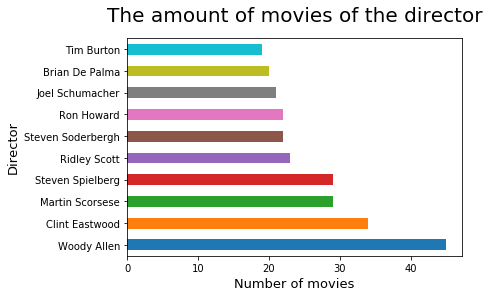

In [76]:
df_movies.director.value_counts().iloc[:10].plot.barh()
plt.xlabel('Number of movies',fontsize=13)
plt.ylabel('Director',fontsize=13)
plt.title('The amount of movies of the director',fontsize=20,y=1.05);

**我们可以看到，美国精英阶层的代表 Woody Allen 导演的作品数量最多。**

### 研究问题5：这些年什么类型的电影最多？哪种类型的电影最卖座？

In [88]:
df_genres = df_movies.genres.str.split('|').apply(pd.value_counts)  #将电影类型分隔开，并用DataFrame的形式呈现出来
df_movies_genres = df_genres.unstack().dropna().reset_index()

In [89]:
df_movies_genres.head()

,level_0,level_1,0
0,Thriller,0,1.0
1,Thriller,1,1.0
2,Thriller,2,1.0
3,Thriller,4,1.0
4,Thriller,5,1.0


In [93]:
#取出第二列，生成一个list
df_genres_list = df_movies_genres.level_0.tolist()

In [94]:
#词频计算
from collections import Counter
Counter(df_genres_list)

Counter({'Thriller': 2904,
         'Action': 2378,
         'Science Fiction': 1223,
         'Adventure': 1466,
         'Fantasy': 912,
         'Crime': 1353,
         'Drama': 4754,
         'Western': 164,
         'Animation': 692,
         'Comedy': 3782,
         'Family': 1223,
         'Mystery': 809,
         'Romance': 1708,
         'War': 270,
         'History': 332,
         'Music': 402,
         'Horror': 1636,
         'Documentary': 509,
         'TV Movie': 162,
         'Foreign': 185})

In [95]:
#将list写入一个文本中，用于绘制云图
genres = open('genres.txt','w')
for i in df_genres_list:
    genres.write(i)
    genres.write(',')
genres.close()

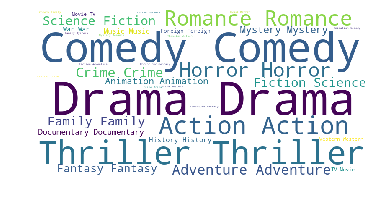

In [102]:
#绘制词云图
from wordcloud import WordCloud
with open('genres.txt','r') as f:
    text = f.read()
wordcloud = WordCloud(width = 800,height = 400,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**我们可以看到，上映的电影类型中 Comedy,Drama,Thriller,Action,Romance这五种类型的片子拍的最多。**

In [109]:
#下面计算票房前20的电影类型都有哪些
df_genres_sort = df_movies.sort_values(by=['revenue_adj'],ascending=False)

#取前二十部电影
df_genres_top20 = df_genres_sort.iloc[:20]
df_genres_top20 = df_genres_top20.genres.str.split('|').apply(pd.value_counts)
df_genres_top20 = df_genres_top20.unstack().dropna().reset_index()

In [110]:
df_genres_top20.head()

,level_0,level_1,0
0,Action,1386,1.0
1,Action,1329,1.0
2,Action,3,1.0
3,Action,8094,1.0
4,Action,4361,1.0


In [111]:
df_genres_top20_list = df_genres_top20.level_0.tolist()
Counter(df_genres_top20_list)

Counter({'Action': 11,
         'Science Fiction': 10,
         'Adventure': 15,
         'Fantasy': 5,
         'Romance': 1,
         'Thriller': 6,
         'Drama': 4,
         'Horror': 2,
         'Family': 4,
         'Mystery': 1,
         'Crime': 3,
         'Animation': 2,
         'Comedy': 1})

In [112]:
top20_genres = dict(Counter(df_genres_top20_list))

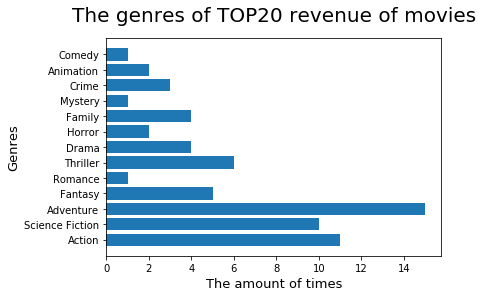

In [123]:
x = list(top20_genres.keys())
y = list(top20_genres.values())

plt.barh(range(len(x)),y,tick_label=x)
plt.xlabel('The amount of times',fontsize = 13)
plt.ylabel('Genres',fontsize = 13)
plt.title('The genres of TOP20 revenue of movies',fontsize = 20,y=1.05);

**从图上看Action,Science Fiction,Adventure,Thriller这四种类型的电影最多，其中Action,Thriller类电影数量多且票房高，而Adventure和Science Fiction 类电影票房高但是数量并不多。相信这会引起电影市场尤其是电影投资方的注意，加大对这两类电影的投入。**

<a id='conclusions'></a>
## 结论

1. 电影评分和电影票房大致呈正相关，其中七分到八分的高票房电影最多；高预算和高评分高票房之间并没有绝对的正向关系；热议度对票房的贡献也不大。
2. 这些年电影数量和电影票房逐年上升，电影行业正处于黄金时代。
3. Comedy,Drama,Thriller,Action,Romance这五种类型的片子拍的较多，其中Action,Thriller比较容易获得高票房，在高票房的其他类型的电影中，Adventure 和 Science Fiction 表现尤为突出，资本市场可以加大对这两种电影的投入。

<a id='bind'></a>
## 限制
1. 我们在进行数据清理的时候办法简单粗暴，直接删除了缺失值和重复项，这可能会对结果产生影响。
2. 在我们分析数据的过程中，发现很多电影是零预算和零票房，我们推测可能是数据丢失也可能是公益电影，以上情况都会对我们的判断造成影响，
3. 在有关电影评分的相关问题中，因为有些电影或因为小众或因为年代久远，导致评分人数很少，评分参考性不强，这会对我们的判断造成一定的影响。